# Kernel Density Estimation (KDE)

http://en.wikipedia.org/wiki/Kernel_(statistics)
<br>http://en.wikipedia.org/wiki/Cumulative_distribution_function

In statistic, KDE is a non-parameteric way to estimate the probability density function of a random variable. KDEs are a fundamental data smoothing problem where the inferences about the population are made based on a finite data sample.

Let $x_1,...x_n$ be univariate independent and identically distributed sample from some distribution with an unknown density $f$. Estimating the shape of the function $f$, we'll use the kernal density estimator:
$$ \hat{f}_h(x)=\frac{1}{n}\sum_{i=1}^nK_h(x-x_i)=\frac{1}{nh}\sum_{i=1}^{n}K\left(\frac{x-x_i}{h}\right)$$
where $K$ is a kernel such that ${K>0}$, $\lim_{h\rightarrow\infty}=1$, and $h>0$ is a smoothing parameter called <b> bandwidth</b>. A kernel with subscrip $h$ is a called a <b>scaled kernel</b> defined as $K_b(x)=\frac{1}{h}K(\frac{x}{h})$ where $h$ should be as small as possible with the trade-off between the bias of the estimator and its variance.

In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

(0, 1)

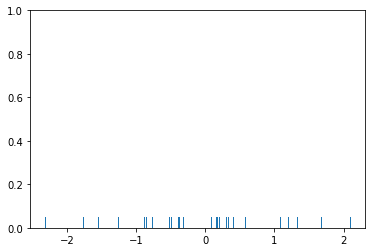

In [10]:
dataset = randn(25)

# A rug plot simpot puts ticks wherever a value occured
sns.rugplot(dataset)

#Set y-axis limit
plt.ylim(0,1)

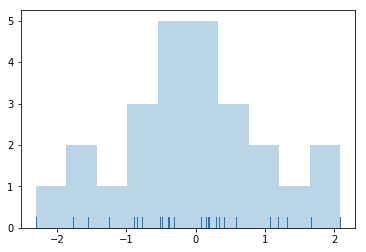

In [13]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)
# this showing us how many ticks in each bar

(0, 1)

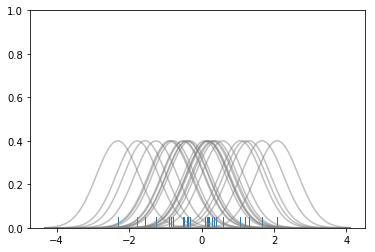

In [15]:
# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

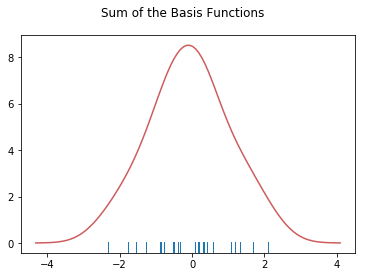

In [18]:
# To get the kde plot we can sum these basis functions.



# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset)

# Get rid of y-tick marks
# plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

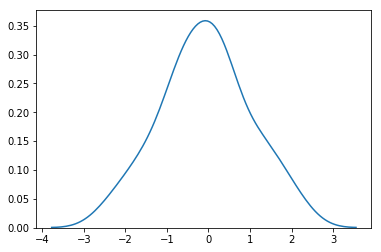

In [19]:
# Now we can see how to do it in one step with seaborn! Awesome!
sns.kdeplot(dataset)

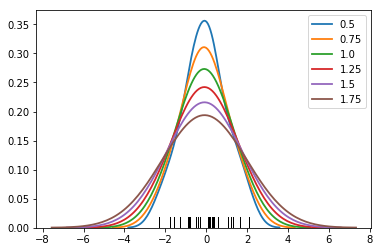

In [20]:

# We can adjust the bandwidth of the sns kde to make the kde plot more or less sensitive to high frequency

# Rugplot
sns.rugplot(dataset,color='black')

# Plot various bandwidths
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

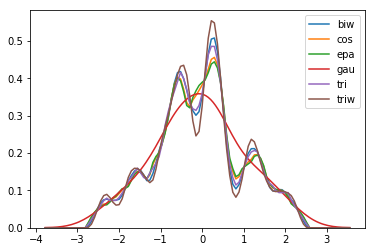

In [21]:
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]
# Use label to set legend
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

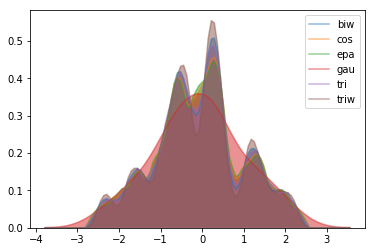

In [22]:
# We can also shade if desired
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

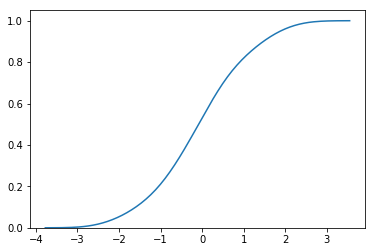

In [23]:
sns.kdeplot(dataset,cumulative=True)

# Multivariate Density Estimation using kdeplot

In [28]:
# Mean center of data
mean = [0,0]

# Diagonal covariance
cov = [[1,0],[0,100]]

# Create dataset using numpy
dataset2 = np.random.multivariate_normal(mean,cov,1000)

# Bring back our old friend pandas
dframe = pd.DataFrame(dataset2,columns=['X','Y'])

dframe.head()

,X,Y
0,0.074985,3.136732
1,1.177545,8.587351
2,0.339391,-1.919600
3,0.726715,13.089370
4,0.197920,9.223116


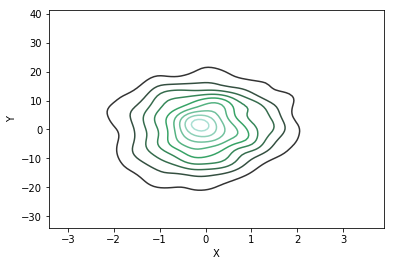

In [30]:
# Plot our dataframe
sns.kdeplot(dframe.X, dframe.Y)

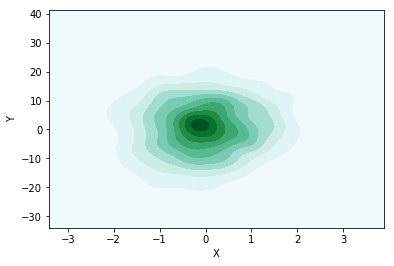

In [31]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

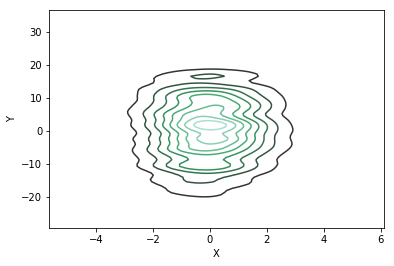

In [34]:
# Can specify a particualr bandwidth
sns.kdeplot(dframe.X,dframe.Y,bw=1)

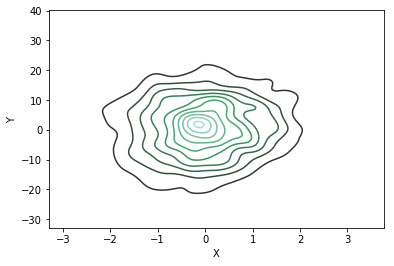

In [35]:
sns.kdeplot(dframe.X,dframe.Y,bw='silverman')

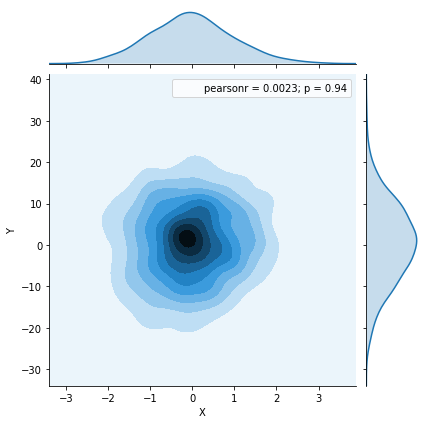

In [36]:
# We can also create a kde joint plot, simliar to the hexbin plots we saw before

sns.jointplot('X','Y',dframe,kind='kde')